In [1]:
%cd ..

/home/feodor/Jupyter/topological-illustrations


/home/feodor/Jupyter/jupyter-env/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

# Load the data

In [3]:
input_path = 'geodata/gebco_2024_n4.0_s-11.0_w118.0_e137.0_ascii.asc'
output_path = "geodata/banda_sea_heights.csv"

# Load ASCII file (modify according to structure)
data = np.loadtxt(input_path, skiprows=6)  # Skip metadata lines

# Convert to DataFrame and save
df = pd.DataFrame(data)
df.to_csv(output_path, index=False)

print(f'df.shape = {df.shape}')

df.shape = (3600, 4560)


In [4]:
heights = df.values

print(f'heights.shape = {heights.shape}')
print(f'heights.min = {heights.min()}')
print(f'heights.max = {heights.max()}')
print(f'heights.mean = {heights.mean()}')

heights.shape = (3600, 4560)
heights.min = -7601.0
heights.max = 4239.0
heights.mean = -1773.7913320540936


# Given Height Data Analysis

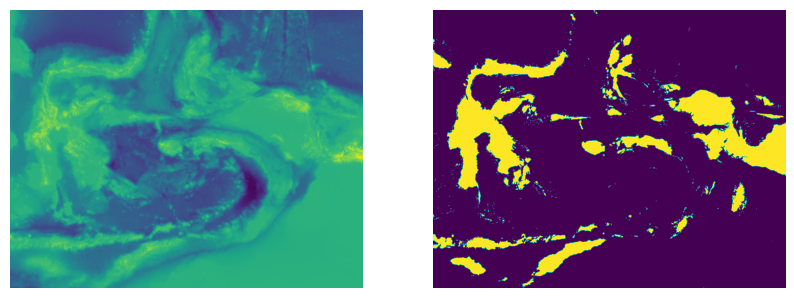

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(heights)
axs[1].imshow(heights >= 0)

axs[0].axis('off')
axs[1].axis('off')

plt.show()

## Height Distribution

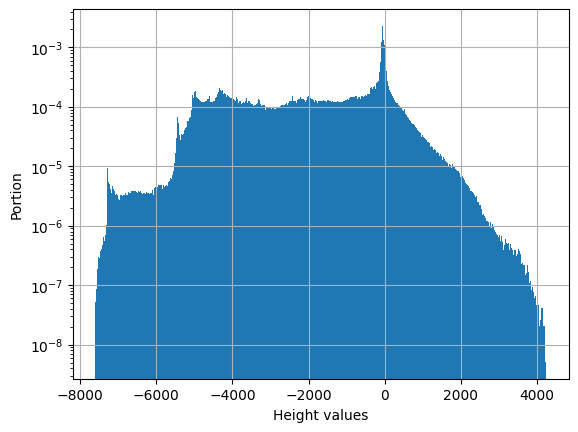

In [6]:
plt.hist(heights.reshape(-1), bins=np.linspace(heights.min(), heights.max(), 1000), density=True, log=True)

plt.xlabel('Height values')
plt.ylabel('Portion')
plt.grid(True)
plt.show()

## Extremums

In [7]:
def get_local_maximums(arr, framed=False):
    # finds the indices of local maxima in a 2D array.
    arr = np.asarray(arr)
    if not isinstance(arr, np.ndarray) or arr.ndim != 2:
        raise ValueError("Input must be a 2D NumPy array")
    
    if not framed:
        new_arr = -np.inf*np.ones(np.array(arr.shape, dtype=int) + 2)
        new_arr[1: -1, 1:-1] = arr
        return get_local_maximums(new_arr, framed=True)

    cond0 = arr[:-2, :-2] < arr[1:-1, 1:-1]
    cond1 = arr[:-2, 1:-1] < arr[1:-1, 1:-1]
    cond2 = arr[:-2, 2:] < arr[1:-1, 1:-1]
    cond3 = arr[1:-1, :-2] < arr[1:-1, 1:-1]
    cond4 = arr[1:-1, 2:] < arr[1:-1, 1:-1]
    cond5 = arr[2:, :-2] < arr[1:-1, 1:-1]
    cond6 = arr[2:, 1:-1] < arr[1:-1, 1:-1]
    cond7 = arr[2:, 2:] < arr[1:-1, 1:-1]

    return np.where(cond0 & cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7)

In [8]:
def get_local_minimums(arr, framed=False):
    # finds the indices of local minima in a 2D array
    arr = np.asarray(arr)
    if not isinstance(arr, np.ndarray) or arr.ndim != 2:
        raise ValueError("Input must be a 2D NumPy array")
    
    if not framed:
        new_arr = +np.inf*np.ones(np.array(arr.shape, dtype=int) + 2)
        new_arr[1: -1, 1:-1] = arr
        return get_local_minimums(new_arr, framed=True)

    cond0 = arr[:-2, :-2] > arr[1:-1, 1:-1]
    cond1 = arr[:-2, 1:-1] > arr[1:-1, 1:-1]
    cond2 = arr[:-2, 2:] > arr[1:-1, 1:-1]
    cond3 = arr[1:-1, :-2] > arr[1:-1, 1:-1]
    cond4 = arr[1:-1, 2:] > arr[1:-1, 1:-1]
    cond5 = arr[2:, :-2] > arr[1:-1, 1:-1]
    cond6 = arr[2:, 1:-1] > arr[1:-1, 1:-1]
    cond7 = arr[2:, 2:] > arr[1:-1, 1:-1]

    return np.where(cond0 & cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7)

In [9]:
def get_saddles(arr, framed=False):
    # finds the indices of saddles in a 2D array
    arr = np.asarray(arr)
    if not isinstance(arr, np.ndarray) or arr.ndim != 2:
        raise ValueError("Input must be a 2D NumPy array")
        
    if not framed:
        new_arr = np.nan*np.ones(np.array(arr.shape, dtype=int) + 2)
        new_arr[1: -1, 1:-1] = arr
        return get_saddles(new_arr, framed=True) 
        
    # Conditions for a saddle point:
    diag1_min = (arr[:-2, :-2] > arr[1:-1, 1:-1]) & (arr[2:, 2:] > arr[1:-1, 1:-1])
    diag1_max = (arr[:-2, :-2] < arr[1:-1, 1:-1]) & (arr[2:, 2:] < arr[1:-1, 1:-1])
    diag2_min = (arr[:-2, 2:] > arr[1:-1, 1:-1]) & (arr[2:, :-2] > arr[1:-1, 1:-1])
    diag2_max = (arr[:-2, 2:] < arr[1:-1, 1:-1]) & (arr[2:, :-2] < arr[1:-1, 1:-1])
    
    saddle_points = (diag1_min & diag2_max) | (diag1_max & diag2_min)
    
    return np.where(saddle_points)

In [10]:
local_maximums = get_local_maximums(heights)
local_minimums = get_local_minimums(heights)
saddles = get_saddles(heights)

print(f'Number of local maximums: {len(local_maximums[0])}')
print(f'Number of local minimums: {len(local_minimums[0])}')
print(f'Number of saddles: {len(saddles[0])}')

Number of local maximums: 82882
Number of local minimums: 66470
Number of saddles: 63335


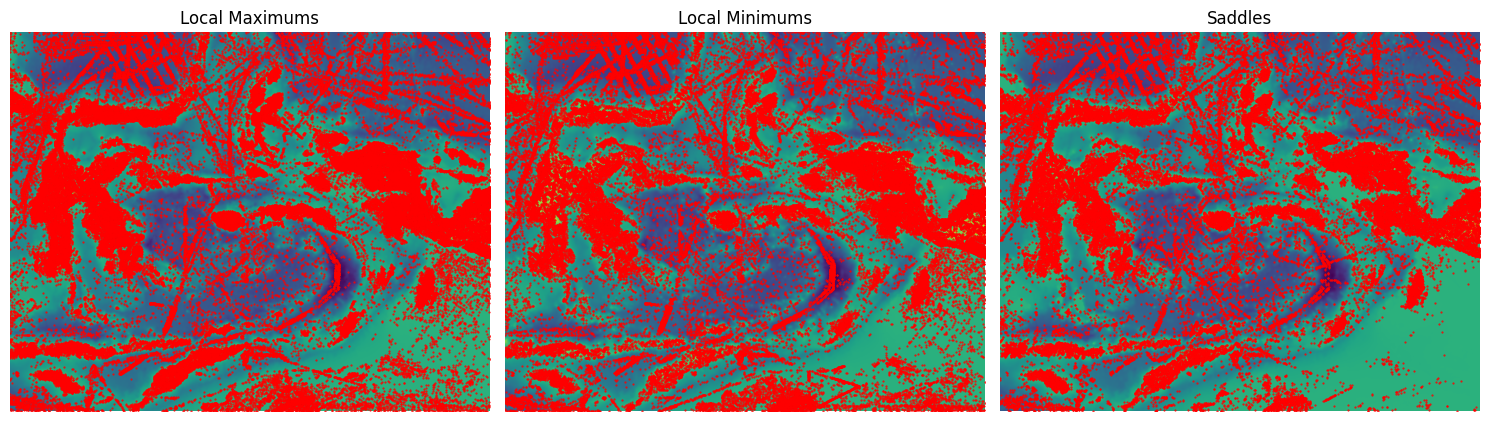

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for i in range(3):
    axs[i].imshow(heights, cmap='viridis')
    axs[i].axis('off')

axs[0].set_title('Local Maximums')
axs[0].scatter(local_maximums[1], local_maximums[0], color='red', marker='.', s=1)

axs[1].set_title('Local Minimums')
axs[1].scatter(local_minimums[1], local_minimums[0], color='red', marker='.', s=1)

axs[2].set_title('Saddles')
axs[2].scatter(saddles[1], saddles[0], color='red', marker='.', s=1)

plt.tight_layout()
plt.show()

# Simplify

## Decrease Resolution

In [12]:
heights_decreased = sp.ndimage.zoom(heights, 0.1)
heights_decreased = heights_decreased.round()
heights_decreased.shape

(360, 456)

In [13]:
local_maximums = get_local_maximums(heights_decreased)
local_minimums = get_local_minimums(heights_decreased)
saddles = get_saddles(heights_decreased)

print(f'Number of local maximums: {len(local_maximums[0])}')
print(f'Number of local minimums: {len(local_minimums[0])}')
print(f'Number of saddles: {len(saddles[0])}')

Number of local maximums: 4558
Number of local minimums: 4009
Number of saddles: 3226


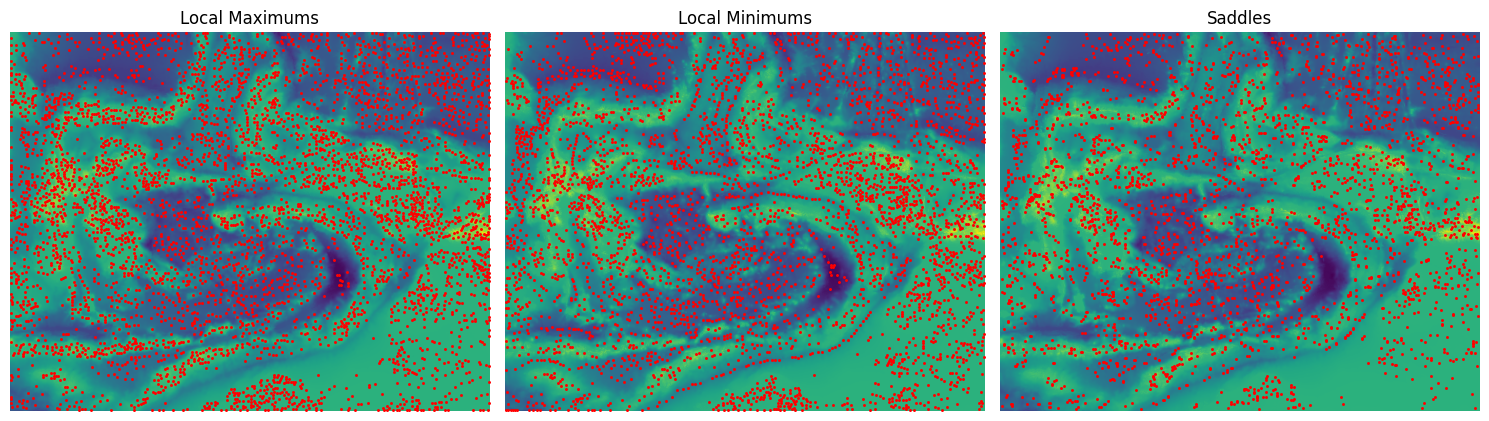

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for i in range(3):
    axs[i].imshow(heights_decreased, cmap='viridis')
    axs[i].axis('off')

axs[0].set_title('Local Maximums')
axs[0].scatter(local_maximums[1], local_maximums[0], color='red', marker='.', s=5)

axs[1].set_title('Local Minimums')
axs[1].scatter(local_minimums[1], local_minimums[0], color='red', marker='.', s=5)

axs[2].set_title('Saddles')
axs[2].scatter(saddles[1], saddles[0], color='red', marker='.', s=5)

plt.tight_layout()
plt.show()

## Decrease Extremums by Smoothing

In [79]:
heights_smoothed = heights_decreased.copy()
heights_smoothed = sp.ndimage.gaussian_filter(heights_smoothed, sigma=2)
heights_smoothed = sp.ndimage.median_filter(heights_smoothed, size=6)

heights_smoothed.shape

(360, 456)

In [88]:
flat = np.linspace(0, 1, np.prod(heights_smoothed.shape)).reshape(heights_smoothed.shape) # plane to remove flat areas
flat *= 0.5*(np.unique(heights_smoothed)[1:] - np.unique(heights_smoothed)[:-1]).min()

local_maximums = get_local_maximums(heights_smoothed + flat)
local_minimums = get_local_minimums(heights_smoothed + flat)
saddles = get_saddles(heights_smoothed + flat)

print(f'Number of local maximums: {len(local_maximums[0])}')
print(f'Number of local minimums: {len(local_minimums[0])}')
print(f'Number of saddles: {len(saddles[0])}')

Number of local maximums: 163
Number of local minimums: 141
Number of saddles: 443


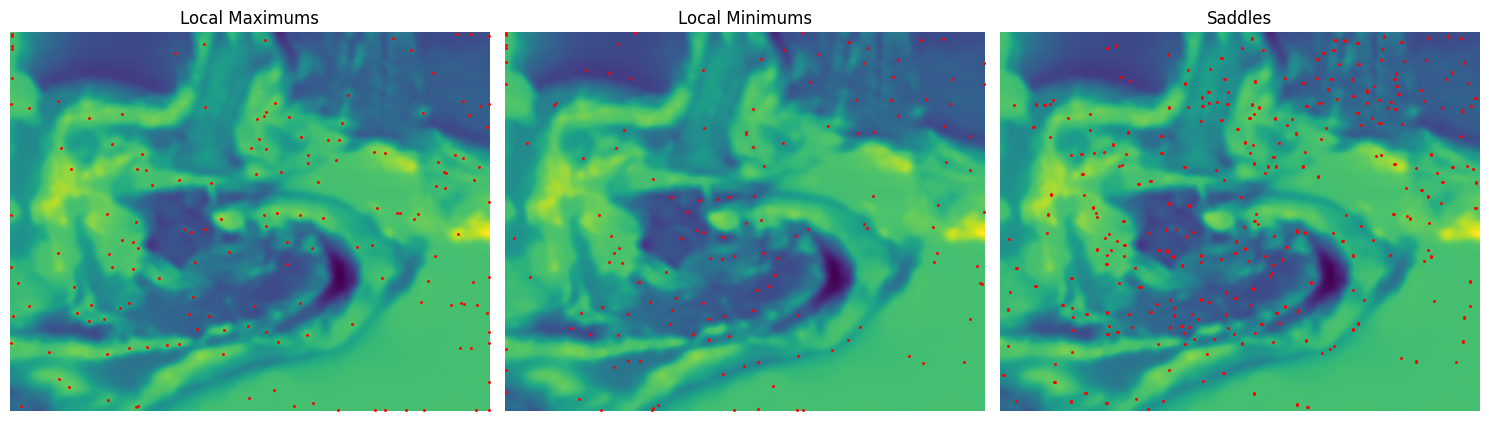

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for i in range(3):
    axs[i].imshow(heights_smoothed, cmap='viridis')
    axs[i].axis('off')

axs[0].set_title('Local Maximums')
axs[0].scatter(local_maximums[1], local_maximums[0], color='red', marker='.', s=5)

axs[1].set_title('Local Minimums')
axs[1].scatter(local_minimums[1], local_minimums[0], color='red', marker='.', s=5)

axs[2].set_title('Saddles')
axs[2].scatter(saddles[1], saddles[0], color='red', marker='.', s=5)

plt.tight_layout()
plt.show()

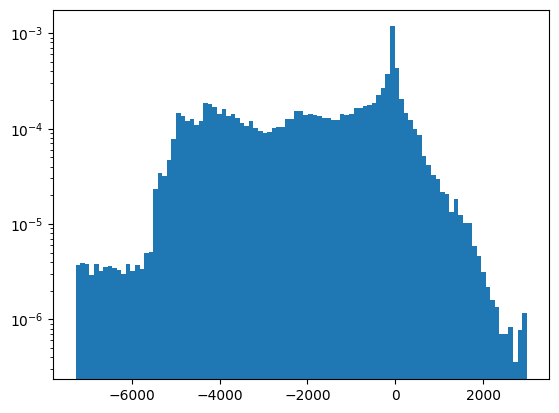

In [90]:
plt.hist(heights_smoothed.reshape([-1]), bins=np.linspace(heights_smoothed.min(), heights_smoothed.max(), 100), density=True, log=True)
plt.show()

In [91]:
len(np.unique(heights_smoothed.round()))/np.prod(heights_smoothed.round().shape)

np.float64(0.04761208576998051)

# Geting Cells

In [165]:
def get_cells(arr, connectivity=4):
    """
    Identifies and separates connected components (cells) of the same height level in a 2D NumPy array.

    Parameters:
    - arr: 2D NumPy array
    - connectivity: 4 (default) or 8, indicating the type of connectivity.

    Returns:
    - List of cells, where each cell is a list of (row, col) coordinates.
    """
    arr = np.asarray(arr)
    if arr.ndim != 2:
        raise ValueError("Input must be a 2D NumPy array")

    values = np.unique(arr)  # Unique height levels
    cells = []
    
    # Define connectivity structure: 4-connectivity or 8-connectivity
    if connectivity == 4:
        structure = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])  # 4-connectivity
    elif connectivity == 8:
        structure = np.ones((3, 3))  # 8-connectivity
    else:
        raise ValueError("Connectivity must be 4 or 8")

    for value in tqdm(values, total=len(values)):
        mask = arr == value  # Binary mask for the current height
        labeled_array, num_features = sp.ndimage.label(mask, structure)  # Identify components

        for i in range(1, num_features + 1):
            cells.append(np.argwhere(labeled_array == i))  # Store component indices

    return cells


In [166]:
rounder = 200
heights_rounded = (heights_smoothed/rounder).round()*rounder

cells_smoothed = get_cells(heights_rounded)

print(f'There are {len(cells_smoothed)} cells.')

  0%|          | 0/52 [00:00<?, ?it/s]

There are 16741 cells.


  0%|          | 0/16741 [00:00<?, ?it/s]

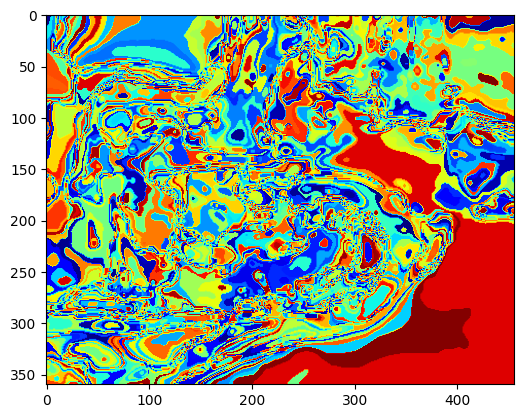

In [174]:
cells_map = np.nan*heights_smoothed
for i_cell, cell in tqdm(enumerate(cells_smoothed), total=len(cells_smoothed)):
    cells_map[cell[:, 0], cell[:, 1]] = np.random.random()#i_cell
plt.imshow(cells_map, cmap='jet')

In [424]:
def get_border(cell, inner=None):
    """
    Returns the indices of cell borders:

    Parameters:
    -----------
    cell: np.array shape (n, 2)
        The indices of the cell

    inner: bool or None
        Returns only indices of points in cell, if True
        Returns only indices of points outside of cell, if False
        Returns all border indices if None

    Returns:
    --------
    np.array shape (k, 2)
    """
    cell = np.asarray(cell)
    if cell.ndim != 2:
        raise ValueError("Input cell must have shape (N, 2)")
    if cell.shape[1] != 2:
        raise ValueError("Input cell must have shape (N, 2)")

    shift = cell.min(axis=0) - 1

    arr = np.zeros(cell.max(axis=0) - cell.min(axis=0) + 3)
    arr[tuple((cell - shift).transpose())] = 1

    border = np.array([arr[1:, 1:], arr[1:, :-1], arr[:-1, 1:], arr[:-1, :-1]])
    border = (border == True).any(axis=0) & (border == False).any(axis=0)

    res = np.zeros(arr.shape, dtype=bool)
    res[:-1, :-1] |= border
    res[1:, :-1] |= border
    res[:-1, 1:] |= border
    res[1:, 1:] |= border

    if inner is None:
        pass
    elif inner:
        res = np.logical_and(res, arr)
    else:
        res = np.logical_and(res, np.logical_not(arr))

    return np.transpose(np.where(res)) + shift

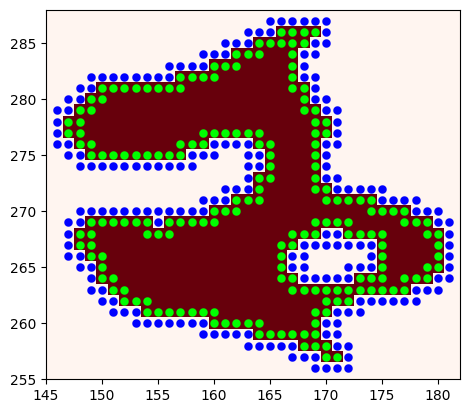

In [431]:
cells_lengths = np.array([len(cell) for cell in cells_smoothed])
cell = cells_smoothed[np.random.choice(np.where(cells_lengths > np.unique(cells_lengths).mean())[0])]

# plot cell
to_plot = 0*heights_smoothed
to_plot[cell[:, 0], cell[:, 1]] = 1

plt.imshow(to_plot, cmap='Reds', vmin=0, vmax=1)

# plot inner border
border = get_border(cell, inner=True)
plt.scatter(border[:, 1], border[:, 0], color='lime', linewidth=0.1)

# plot outer border
border = get_border(cell, inner=False)
plt.scatter(border[:, 1], border[:, 0], color='blue', linewidth=0.1)


plt.ylim(cell[:, 0].min() - 2, cell[:, 0].max() + 2)
plt.xlim(cell[:, 1].min() - 2, cell[:, 1].max() + 2)
plt.show()